In [2]:
import pandas as pd 
import numpy as np 
import os 
import seaborn as sb
from matplotlib import pyplot as plt

#### This notebook is used to analyze sugarscape price equillibrium with different agent types

In [10]:
os.listdir("parquet")

['basic-arbitrageur', 'basic-optimizer-arbitrageur', 'optimizer-arbitrageur']

#### Replicate these variables from the GUI.py file. Could be called from this notebook but there would be too many print statements. Choose which variables to save in cols. 

In [11]:
model_attributes = ["population", "total_exchanges", "total_agents_created", "total_avg_price", "runtime", "water_avg_price", "sugar_avg_price", "tech_eff_capital",
                      #"num_basicherders", "num_arbitrageurherders", "num_basicbasics", "num_arbitrageurbasics", 
                               "bb_res_demand", "bh_res_demand", "ab_res_demand", "ah_res_demand"]

runs = 20

cols = ["population", "tech_eff_capital", "total_avg_price", "runtime", "water_avg_price", "sugar_avg_price"]

#### This code gets all of the run data for the selected cols

In [12]:
breeds = os.listdir('parquet')
data_by_breeds = {}
for primary_breed_set in breeds:
    data_by_breeds[primary_breed_set] = {}
    for attr in cols: 
        data_by_breeds[primary_breed_set][attr] = {}
        for run in range(runs): 
            data_by_breeds[primary_breed_set][attr][run] = pd.read_parquet("parquet/" + primary_breed_set + "/" + attr + "/" + str(run) + ".parquet")[attr]

FileNotFoundError: [Errno 2] No such file or directory: 'parquet/basic-optimizer-arbitrageur/population/0.parquet'

#### This code pulls the final price - the equillibrium - from each run 

In [6]:
price_data = {}
for breed_set in breeds: 
    price_data[breed_set] = []
    for run in range(runs): 
        price_data[breed_set].append(data_by_breeds[breed_set]["total_avg_price"][run][len(data_by_breeds[breed_set]["total_avg_price"][run]) - 1])

KeyError: 'total_avg_price'

#### This code gets the standard deviation of the price equillibriums by breed set

In [7]:
for breeds in price_data.keys(): 
    print(breeds + ": " + str(np.std(price_data[breeds])))

basic-arbitrageur: 0.11259928719189366
basic-optimizer-arbitrageur: nan


C:\Users\NDSU-Prof\anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\NDSU-Prof\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\NDSU-Prof\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [8]:
bins = [.75 + i * .05 for i in range(6)]

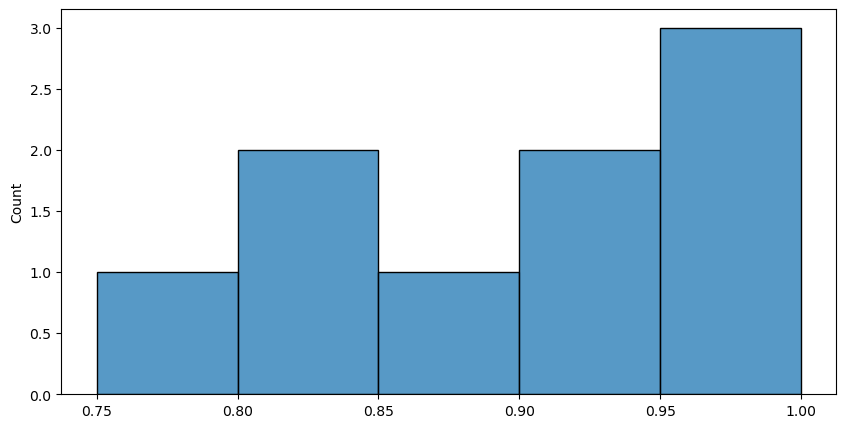

In [9]:
fig, ax = plt.subplots(figsize = (10, 5))
for i, breeds in enumerate(price_data.keys()): 
    sb.histplot(price_data[breeds], bins=bins, c="C" + str(i),  ax=ax)
    



With current implementation, the spread in price equillibriums is significantly smaller with just optimizer agents.